# Bank Customer Churn Model

-------------

## **Objective**

Objective is to find the customer churn model inside large dataset and then create a model to predict wheather coustomer is likely to leave 

## **Data Source**

https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv

## **Import Library**

In [11]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 1.8 MB/s eta 0:00:00m eta 0:00:010:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 1.3 MB/s eta 0:00:00m eta 0:00:010:01:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 KB 3.9 MB/s eta 0:00:00 MB/s eta 0:00:01:01


In [13]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 3.5 MB/s eta 0:00:00m eta 0:00:010:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 1.2 MB/s eta 0:00:001.2 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 KB 66.4 kB/s eta 0:00:00 kB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.8 MB/s eta 0:00:00 MB/s eta 0:00:01:01


In [15]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 KB 39.8 kB/s eta 0:00:000:00:010:00:02:07


In [16]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

## **Import Data**

In [17]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

## **Describe Data**

In [18]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [21]:
df.duplicated('CustomerId').sum()

0

In [22]:
df = df.set_index('CustomerId')

## **Data Visualization**

In [23]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

## **Data Preprocessing**

In [24]:
df.replace({'Geography' : {'France' : 2, 'Germany':1, 'Spain':0}},inplace = True)

In [25]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [41]:
df.replace({'Num Of Products': {1:0, 2:1, 3:1, 4:1}}, inplace=True)

In [42]:
df['Has Credit Card'].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [43]:
df['Is Active Member'].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [44]:
df.loc[(df['Balance']==0), 'Churn'].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

In [46]:
df['Zero Balance'] = np.where(df['Balance']>0,1,0)

<Axes: >

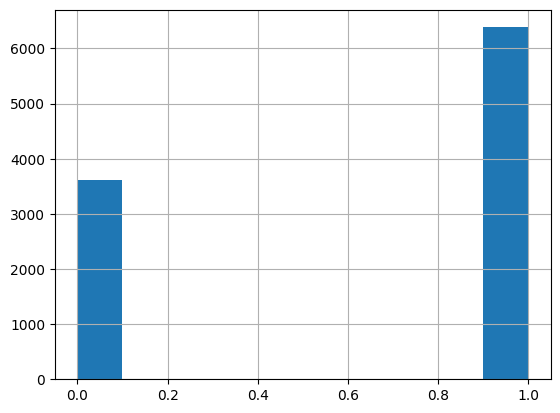

In [47]:
df['Zero Balance'].hist()

In [48]:
df.groupby(['Churn', 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance   
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064  \
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member   
Churn Geography                                                       
0     0                     2064             2064              2064  \
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

In [49]:
X=df.drop(['Surname','Churn'],axis = 1)

In [50]:
Y = df['Churn']

In [51]:
X.shape

(10000, 11)

In [52]:
Y.shape

(10000,)

In [ ]:
#Random Under Sampling

In [54]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 KB 259.7 kB/s eta 0:00:001m304.7 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 4.7 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 6.0 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 1.1 MB/s eta 0:00:00 MB/s eta 0:00:01


In [60]:
from imblearn.under_sampling import RandomUnderSampler

In [63]:
rus = RandomUnderSampler(random_state=2529)

In [65]:
X_rus, Y_rus = rus.fit_resample(X,Y)

In [66]:
X_rus.shape

(4074, 11)

In [67]:
Y_rus.shape

(4074,)

In [69]:
Y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [70]:
Y_rus.value_counts()

Churn
0    2037
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

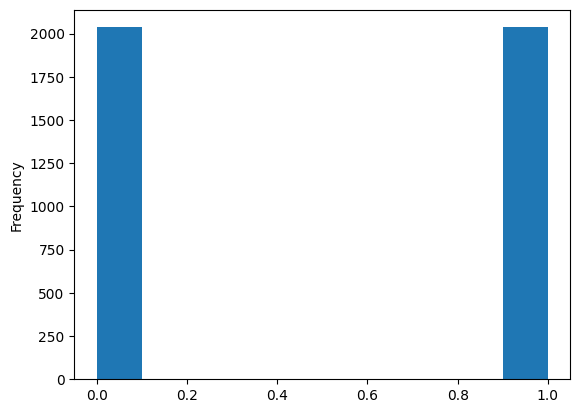

In [71]:
Y_rus.plot(kind = 'hist')

## **Define Target Variable (y) and Feature Variables (X)**

In [149]:
X = X[['CreditScore','Age','Tenure','Balance','Estimated Salary']]

In [ ]:
Y = Y

## **Train Test Split**

In [73]:
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2359 sha256=1a9da7c7cf8e4d470fff7933277050d3ea165cecd76a6910a360bb05fca1155a
  Stored in directory: /home/vinayak/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


In [101]:
from sklearn.model_selection import train_test_split

In [150]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [ ]:
#Split the datset first then apply the standar scaler

In [132]:
from sklearn.preprocessing import StandardScaler

In [118]:
sc = StandardScaler()

In [151]:
X_test.head()

,CreditScore,Age,Tenure,Balance,Estimated Salary
CustomerId,,,,,
15687492,596,32,3,96709.07,41788.37
15736963,623,43,1,0.00,146379.30
15721730,601,44,4,0.00,58561.31
15762134,506,59,8,119152.10,170679.74
15648898,560,27,7,124995.98,114669.79


In [157]:
Y_test.head()

CustomerId
15687492    0
15736963    0
15721730    0
15762134    0
15648898    0
Name: Churn, dtype: int64

In [152]:
X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [153]:
X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

## **Modeling**

In [154]:
from sklearn.svm import SVC

In [180]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [155]:
svc = SVC()

In [156]:
svc.fit(X_train,Y_train)

SVC()

## **Prediction**

In [160]:
results = svc.predict(X_test)

In [175]:
confusion_matrix(Y_test, results)

array([[2358,   58],
       [ 505,   79]])

## **Model Evaluation**

In [182]:
print(classification_report(Y_test, results))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      2416
           1       0.58      0.14      0.22       584

    accuracy                           0.81      3000
   macro avg       0.70      0.56      0.56      3000
weighted avg       0.78      0.81      0.76      3000



In [188]:
from sklearn.model_selection import GridSearchCV

In [203]:
pram_grid = {'C':[0.1,1,10],
            'gamma':[1,0.1,0.01],
            'kernel':['rbf'],
            'class_weight':['balanced']}

In [204]:
grid_finder = GridSearchCV(SVC(), pram_grid, refit=True,verbose=2, cv=2)

In [205]:
grid_finder.fit(X_train,Y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.0s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.8s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.8s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.9s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [207]:
grid_finder.best_estimator_

SVC(C=10, class_weight='balanced', gamma=0.1)

In [208]:
best_results=grid_finder.predict(X_test)

In [209]:
print(classification_report(Y_test, best_results))

              precision    recall  f1-score   support

           0       0.89      0.75      0.82      2416
           1       0.38      0.64      0.48       584

    accuracy                           0.73      3000
   macro avg       0.64      0.69      0.65      3000
weighted avg       0.79      0.73      0.75      3000



## **Explaination**

We discuss the steps involved in data preprocessing, including data encoding, feature scaling, and handling imbalanced data. Specifically, we use the random under-sampling and random over-sampling techniques to handle the imbalance in the dataset. We also use support vector machine classifier and hyperparameter tuning to find the most appropriate model. We begin by importing the necessary libraries, importing the dataset, and analyzing the data. We then proceed to encode the categorical variables in the dataset and handle the imbalance in the data. Finally, we split the data into training and testing sets, apply feature scaling, and train the SVM model using the training data. We evaluate the model's performance using various metrics and hyperparameter tuning techniques to optimize the model's performance. Overall, the conversation covers various techniques involved in building a machine learning model for customer churn prediction.